# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


Generate the data

In [13]:
# Generate points from 0 to 3
x_0, x_n, N = 0, 3, 100
xnum = np.linspace(x_0, x_n, N)

# Normal distribution
mu, sigma = 0, 0.1
eps_num = [np.random.normal(mu, sigma) for x in xnum]

# Sine function
def f(x):
    return x*np.sin(x)

# Needed function
def y(x):
    return f(x) + eps_num

Plot the data

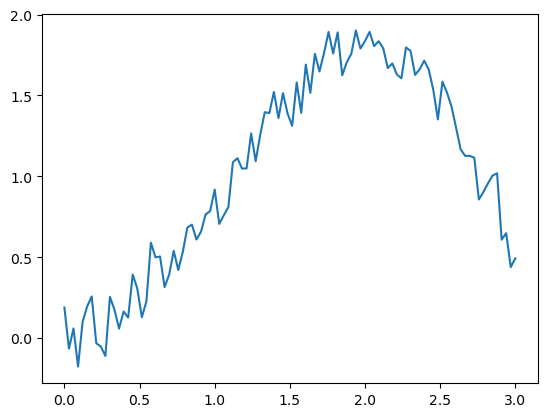

In [14]:
plt.plot(xnum, y(xnum))

We split the data into training, cross-validation, and test set using `sklearn.model_selection.train_test_split`. Since `sklearn` only splits the data into two and not three like we need, we can split the data into two first, and split it again. 

In [15]:
# Import splitter
from sklearn.model_selection import train_test_split

# Split the data 50-50
x_train, x_half, y_train, y_half = train_test_split(xnum, y(xnum), train_size=0.5, random_state=0) # train_size=0.5 kasi kalahati, random_state=0 yun yung seed sa splitting

# Split the data again to 25-25
x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) 

We then get the polynomial fits from $d=0$ to $d=14$. 

In [16]:
# Start and end of degree
d0, dn = 0, 14

# Fitting of polynomial
polyfits_train = [np.polyfit(x_train, y_train, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in range(d0, dn+1)]

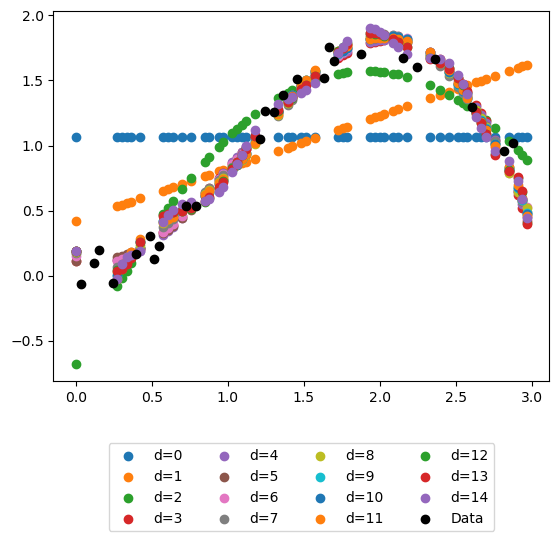

In [17]:
# Plotting the function
for i in range(d0, dn+1):
    plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i))
plt.scatter(x_cross, y_cross, color='k', label='Data')
plt.legend(loc='upper center', ncol=4, fancybox=True, bbox_to_anchor=(0.5,-0.15))

To get the rms error of the cross-validation `y_cross` and our obtained fits in `polys` for cross-validation, we need to use `sklearn.metrics.mean_squared_error`.

In [18]:
# Import from sklearn
from sklearn.metrics import mean_squared_error

# Fitting of polynomial
polyfits_cross = [np.polyfit(x_cross, y_cross, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_cross = [np.poly1d(polyfits_cross[i])(x_cross) for i in range(d0, dn+1)]

# Get the rms errors of cross-validation and their fits
rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in range(d0, dn+1)]

# Get the rms errors of training and their fits 
rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in range(d0, dn+1)]

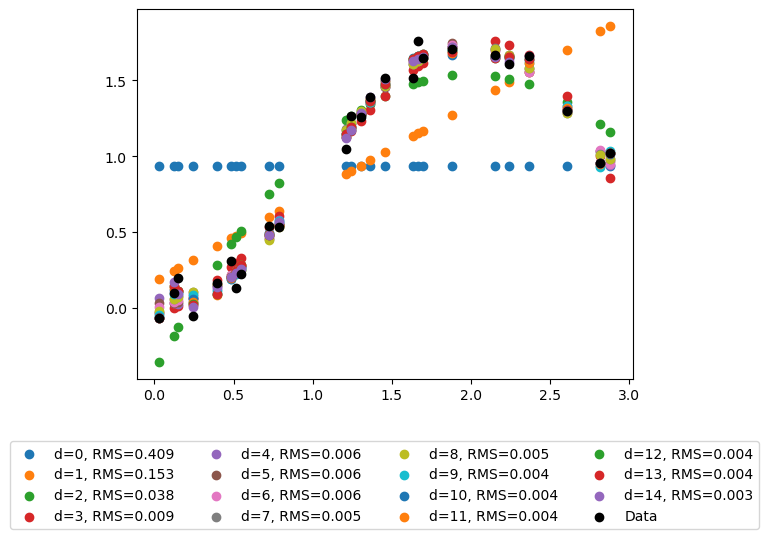

In [19]:
for i in range(d0, dn+1):
    plt.scatter(x_cross, polys_cross[i], label='d={degree}, RMS={rms}'.format(degree = i, rms=round(rmses_cross[i], 3)))
plt.scatter(x_cross, y_cross, color='k', label='Data')
plt.legend(loc='upper center', ncol=4, fancybox=True, bbox_to_anchor=(0.5,-0.15))

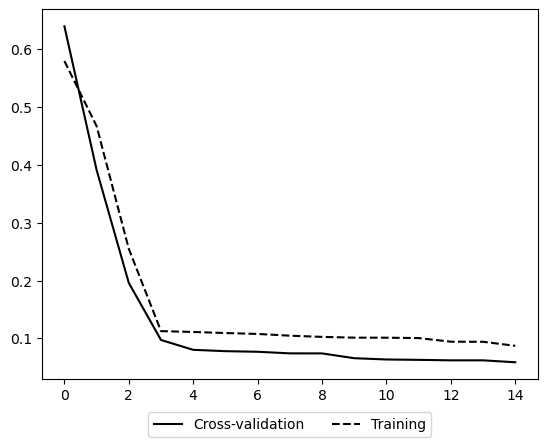

In [20]:
plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='-')
plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))


We can also get the rms errors for the test set. 

In [21]:
# Fitting of polynomial
polyfits_test = [np.polyfit(x_test, y_test, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_test = [np.poly1d(polyfits_test[i])(x_test) for i in range(d0, dn+1)]

# Get the rms errors of cross-validation and their fits
rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in range(d0, dn+1)]

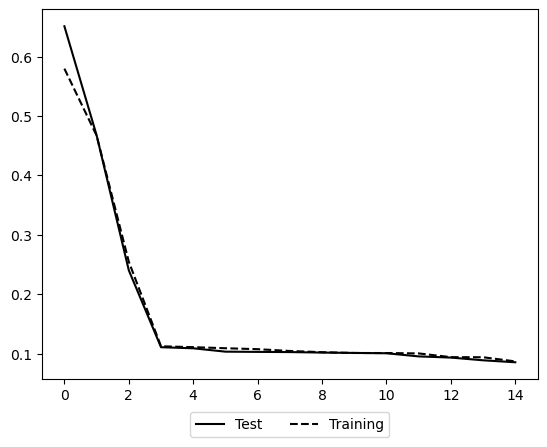

In [22]:
plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='-')
plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

Let's try making this into a neat function. However, we're only taking 

In [23]:
def mean_error(func, x_list):
    # Normal distribution
    mu, sigma = 0, 0.1
    eps_num = [np.random.normal(mu, sigma) for x in x_list]

    def y(x):
        return func(x) + eps_num

    # Degree range 
    deglist = [2, 3, 5, 10, 14]

    # Split the data 50-50
    x_train, x_half, y_train, y_half = train_test_split(x_list, y(x_list), train_size=0.5, random_state=0) 
    x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) 

    # Fitting of polynomial train
    polyfits_train = [np.polyfit(x_train, y_train, i) for i in deglist]
    polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in deglist]

    # Fitting of polynomial cross
    polyfits_cross = [np.polyfit(x_cross, y_cross, i) for i in deglist]
    polys_cross = [np.poly1d(polyfits_cross[i])(x_cross) for i in deglist]

    # Using the polynomial fits and plot
    polyfits_test = [np.polyfit(x_test, y_test, i) for i in deglist]
    polys_test = [np.poly1d(polyfits_test[i])(x_test) for i in deglist]

    # Get the rms errors of cross-validation and their fits
    rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in deglist]
    rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in deglist]
    rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in deglist]

    # Plots
    plt.figure(figsize=[7,20])
    ## Plot of the data with the fits
    plt.subplot(1, 3, 1)
    plt.title('Polynomial fits of the training data')
    plt.scatter(x_list, y(x_list), color='k', label='Data')
    for i in deglist:
        plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i))
    ## Plot of RMS between cross-validation and training 
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. cross-validation and training data')
    plt.plot(deglist, np.sqrt(rmses_cross), label='Test', color='k', linestyle='-')
    plt.plot(deglist, np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))
    ## Plot of RMS between test and training
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. test and training data')
    plt.plot(deglist, np.sqrt(rmses_test), label='Test', color='k', linestyle='-')
    plt.plot(deglist, np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))